In [1]:
from sklearn.datasets import make_circles
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# create data
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [3]:
# split data
split = int(0.8 * len(X))

X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

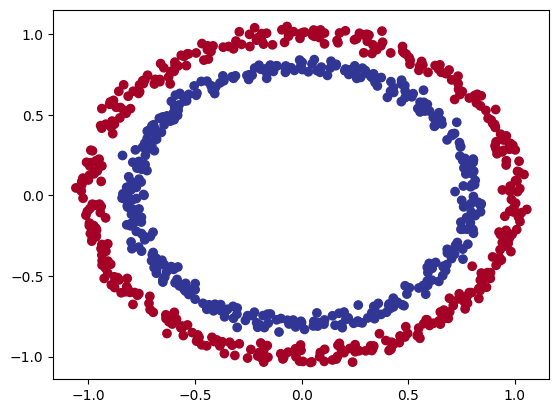

In [4]:
# plot
plt.scatter(x=X_train[:, 0],
            y=X_train[:, 1],
            c=y_train,
            cmap=plt.cm.RdYlBu)

In [5]:
# model
class modelC(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(in_features=2, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=1)
    )

  def forward(self, x):
    return self.model(x)

model = modelC()
model

modelC(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [6]:
# loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [7]:
# device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

model = model.to(device)

In [8]:
import requests
from pathlib import Path

link = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py'

if Path('helper_functions.py').is_file():
  print('helper_functions.py is exist, skipping download')
else:
  print('downloading helper_functions.py')
  request = requests.get(link)
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import *

downloading helper_functions.py


In [9]:
# train
epochs = 1600

model = model.to(device)

for epoch in range(epochs):
  model.train() # train mode
  logits = model(X_train).squeeze() # raw logits
  loss = loss_fn(logits, y_train) # bcewith logits loss
  preds = torch.round(torch.sigmoid(logits)) # apply sigmoid to logits
  acc = accuracy_fn(y_train, preds) # calculate the accuracy
  optimizer.zero_grad() # set gradients to zero
  loss.backward() # getting the gradients
  optimizer.step() # lowering the loss

  model.eval() # evaluation mode
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_loss = loss_fn(test_logits, y_test)
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_acc = accuracy_fn(y_test, test_preds)

  if epoch % 20 == 0:
    print(f'epoch: {epoch} | train loss: {loss:.5f} | test loss: {test_loss:.5f} | accuracy: {acc:.2f}% | test accuracy: {test_acc:.2f}%')

epoch: 0 | train loss: 0.70373 | test loss: 0.72960 | accuracy: 51.50% | test accuracy: 44.00%
epoch: 20 | train loss: 0.69355 | test loss: 0.70694 | accuracy: 51.50% | test accuracy: 44.00%
epoch: 40 | train loss: 0.69117 | test loss: 0.69946 | accuracy: 51.50% | test accuracy: 44.00%
epoch: 60 | train loss: 0.69033 | test loss: 0.69671 | accuracy: 51.50% | test accuracy: 44.00%
epoch: 80 | train loss: 0.68965 | test loss: 0.69535 | accuracy: 51.50% | test accuracy: 44.00%
epoch: 100 | train loss: 0.68898 | test loss: 0.69451 | accuracy: 51.50% | test accuracy: 44.00%
epoch: 120 | train loss: 0.68827 | test loss: 0.69388 | accuracy: 51.50% | test accuracy: 44.00%
epoch: 140 | train loss: 0.68752 | test loss: 0.69334 | accuracy: 51.50% | test accuracy: 44.00%
epoch: 160 | train loss: 0.68670 | test loss: 0.69284 | accuracy: 51.50% | test accuracy: 44.00%
epoch: 180 | train loss: 0.68580 | test loss: 0.69230 | accuracy: 54.75% | test accuracy: 45.00%
epoch: 200 | train loss: 0.68484 | t

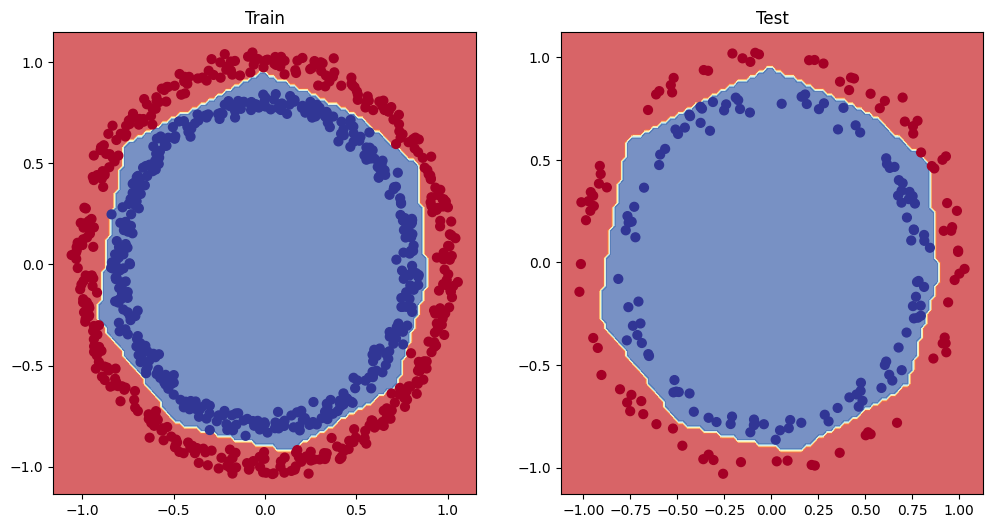

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)